In [2]:
from modules.simple_ann_for_classification import SimpleANN, sigmoid, relu , softmax
import numpy as np
import pandas as pd
import re
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

In [4]:
import pandas as pd


df = pd.read_csv('../data/spam_classification.csv')

In [5]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
print("Random Ham: " , df[df['Category'] == 'ham'].sample(1)['Message'].values[0])

Random Ham:  Awww dat is sweet! We can think of something to do he he! Have a nice time tonight ill probably txt u later cos im lonely :( xxx.


In [7]:
print("Random Spam: " , df[df['Category'] == 'spam'].sample(1)['Message'].values[0])

Random Spam:  sexy sexy cum and text me im wet and warm and ready for some porn! u up for some fun? THIS MSG IS FREE RECD MSGS 150P INC VAT 2 CANCEL TEXT STOP


In [8]:
df.shape

(5572, 2)

In [9]:
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer


def preprocess_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'\d+', '', text)  # Removing numbers
    text = re.sub(r'[^\w\s]', '', text)  # Removing punctuation
    text = text.strip()  # Removing leading/trailing whitespace
    return text

df['Message'] = df['Message'].apply(preprocess_text)
df.dropna(inplace=True)


In [10]:

label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['Category'])


In [11]:
df.head()

,Category,Message,category_encoded
0,ham,go until jurong point crazy available only in ...,0
1,ham,ok lar joking wif u oni,0
2,spam,free entry in a wkly comp to win fa cup final...,1
3,ham,u dun say so early hor u c already then say,0
4,ham,nah i dont think he goes to usf he lives aroun...,0


In [12]:

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['Message']).toarray()
y = df['category_encoded'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
X_train.shape

(4457, 5000)

In [20]:
import matplotlib.pyplot as plt

# Convert labels to one-hot encoding
num_classes = len(np.unique(y_train))
print("Number of Classes: ", num_classes)




Number of Classes:  2


In [10]:
# Initialize the model
input_size = X_train.shape[1]
hidden_size = 100  # You can adjust this
output_size = num_classes
ann = SimpleANN(input_size, hidden_size, output_size, activation='relu')



In [12]:
# Train the model
epochs = 1000  # You can adjust this
learning_rate = 0.1  # You can adjust this

ann.train(X_train, y_train, epochs, learning_rate)



Epoch 0, Loss: 3.715203482022408
Epoch 100, Loss: 1.0559789667022474
Epoch 200, Loss: 0.6725973719224837
Epoch 300, Loss: 0.501070159667152
Epoch 400, Loss: 0.4048190609819573
Epoch 500, Loss: 0.34571770550197267
Epoch 600, Loss: 0.30639842394842004
Epoch 700, Loss: 0.2784668760732367
Epoch 800, Loss: 0.2576051602180329
Epoch 900, Loss: 0.24111301384914252


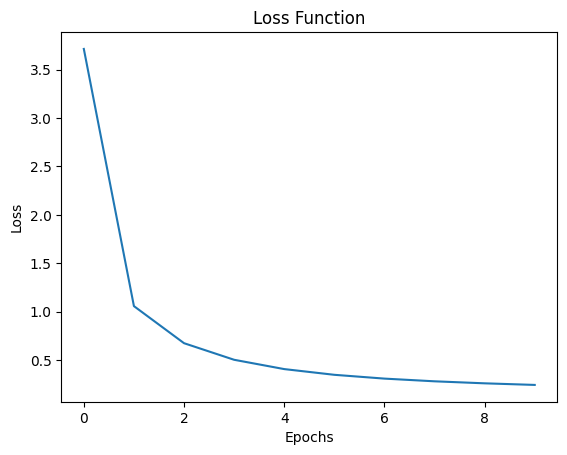

In [13]:
# Plot the loss function
plt.plot(ann.loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function')
plt.show()

In [17]:
# Predictions
y_pred = ann.predict(X_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)

# Classification report
print(classification_report(y_test_labels, y_pred_labels))

              precision    recall  f1-score   support

         ham       0.93      0.95      0.94       966
        spam       0.64      0.54      0.59       149

    accuracy                           0.90      1115
   macro avg       0.78      0.75      0.76      1115
weighted avg       0.89      0.90      0.89      1115



In [21]:
# Save model weights and biases
model_data = {
    'weights_input_hidden': ann.weights_input_hidden,
    'bias_input_hidden': ann.bias_input_hidden,
    'weights_hidden_output': ann.weights_hidden_output,
    'bias_hidden_output': ann.bias_hidden_output,
    'tfidf_vectorizer': tfidf_vectorizer,
    'label_encoder': label_encoder
}

with open('../models/text_classifier.pkl', 'wb') as file:
    pickle.dump(model_data, file)